# Data Science Practical Exam

In [16]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn as sk
import tensorflow as tf 

In [17]:
from IPython.core.display import display,HTML 
display(HTML("<img src='images/exam.jpg' height=500, width=800 style='transform:rotate(180deg);' /> "))

## Q-1: Multiple Regression 

For this question, the task is to apply multiple linear regression on the Boston Housing dataset available on the UCI Machine Learning Repository.

Data is presented in .data format. 

### Before Loading Data in Pandas:

- The data should first be extracted into a .txt format. 
- Using file I/O within Python, comma delimiters need to be added to the data. 
- Labels should be added from the .names as the first line of the txt file. 
- A file conversion needs to be done from the txt file to a csv file. 


In [18]:
ls data/

housing.csv       housing_data.txt  iris_data.csv


In [19]:
# Opening house.data file and blank text file: housing.txt

house_dat = open('data/housing_data.txt', "r")
new_house_dat = open('data/housing.txt', "w")

# Adding column names of the Boston Housing Dataset from boston.names on UCI repository.

attributes = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"]
attributes = ','.join(attributes) + '\n'
print(attributes) 

# Building a list comprehension to read all data in a list 

lineArr = [i for i in house_dat.readlines()] 

# Building the file write intuition for the units per column to be separated by commas and each line to be on the next line

print(lineArr[0])
print(','.join(lineArr[0].split()))  
# Writing the attributes to a new text file
new_house_dat.write(attributes) 
# Looping through each line in the List Comprehension to be written to the new text file
for line in lineArr:
    new_house_dat.write(','.join(line.split()) + '\n') 
new_house_dat.close() 

# Confirming length of each line separated by commas with number of attributes to be equal

print(len(attributes.split(',')) == len(lineArr[0].split())) 








  

CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV

 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00

0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
True


In [20]:
mv data/housing.txt data/housing.csv 

In [21]:
ls data/

housing.csv       housing_data.txt  iris_data.csv


### Loading Data Into Pandas 

In [22]:
boston_df = pd.read_csv("data/housing.csv")
boston_df.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [23]:
# Ensuring that there are no missing values 
boston_df.isnull().sum() 

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Exploratory Data Analysis of Boston Dataset

1. Visualize distribution of the MEDV variable to look for normality. 
2. Build correlation matrix to see which variables have strong linearity with MEDV
3. Check for multicollinearity between features. 

[]

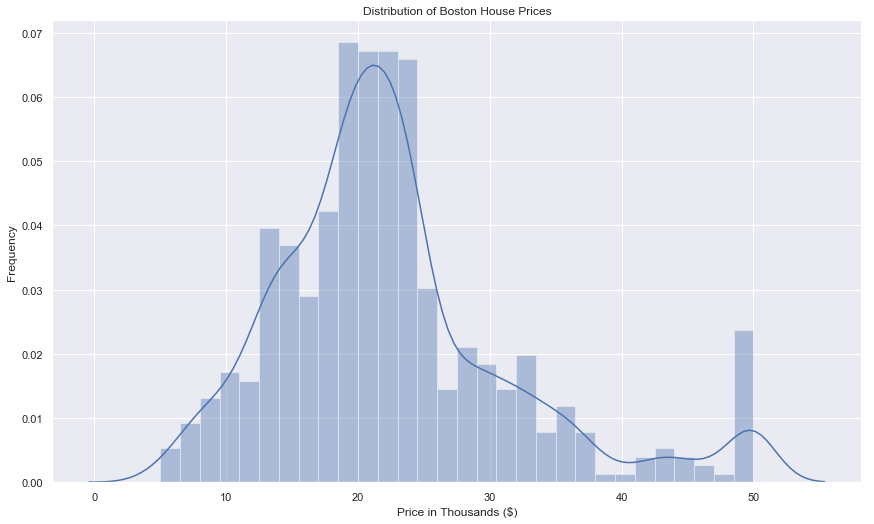

In [24]:
# Visualizing distribution of Boston House prices

sns.set(rc={'figure.figsize':(14.5,8.5)})
ax = sns.distplot(boston_df['MEDV'], bins=30) 
ax.set_title("Distribution of Boston House Prices") 
ax.set_xlabel("Price in Thousands ($)") 
ax.set_ylabel("Frequency")
ax.plot() 

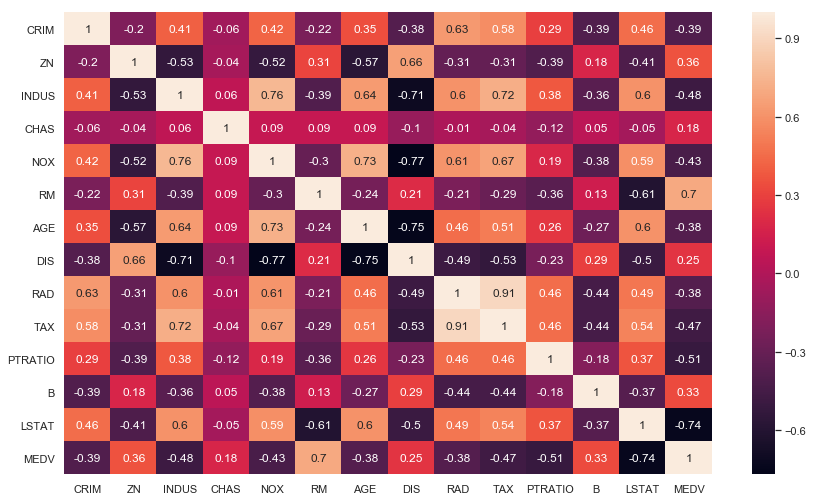

In [25]:
# Measuring Linear Relationships Between the Variables

# Correlation Matrix

correlation_matrix = boston_df.corr().round(2)

# Visualization using seaborn heatmap

sns.heatmap(data=correlation_matrix, annot=True) 

Variables with high multicollinearity:

$$ r_{[\text{RAD, TAX}]} = 0.91  $$

$$ r_{[\text{DIS, AGE}]} = -0.75 $$ 

After accounting for multicollinearity, the best variables to choose for the multiple regression features are RM and LSTAT. 